
# 0.0. imports


## 0.1. Helper functions



## 0.2. Loading data



In [3]:
import pandas as pd
import inflection
import numpy as np

In [28]:
df_sales_raw = pd.read_csv('/home/jan/ds_producao/ds_prod/data/rossmann-store-sales/train.csv', low_memory=False)
df_store_raw = pd.read_csv('/home/jan/ds_producao/ds_prod/data/rossmann-store-sales/store.csv', low_memory=False)

#merge dos dataframe

data_merge = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

#para que serve o on, no método merge?

# 1.0. DESCRIÇÃO DOS DADOS



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [5]:
df1_copy = data_merge.copy()
data_merge.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1. renomeando as colunas




In [6]:
colunas = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
        'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
        'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)
cols_new  = list(map(snakecase, colunas))

#renomeando as colunas 

df1_copy.columns = cols_new




## 1.2. data dimensions


In [7]:
print(f'Number of rows {df1_copy.shape[0]}')
print(f'Number of cols {df1_copy.shape[1]}')

Number of rows 1017209
Number of cols 18


In [8]:
df1_copy.date = pd.to_datetime(df1_copy.date)
df1_copy.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.3. Check NA




In [9]:
df1_copy.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

### Existem 3 maneira de tratar NA

#### - Excluir. Mas perdemos dados e isso pode nos projudicar. Rapido e facil mas estamos jogando dados fora
----

#### - Usar algoritimos de ml onde nós substituimos as colunas vazias pelo proprio comportamento da coluna, como média, mediana ou o algortimo estima qual numero estaria ali. 
----

#### - E a 3 forma, é entender o porque aquele dado esta faltando. 



## 1.4. Fillout NA



In [10]:
import math

In [11]:
df1_copy['competition_open_since_year']

0          2008.0
1          2007.0
2          2006.0
3          2009.0
4          2015.0
            ...  
1017204    2014.0
1017205    2006.0
1017206       NaN
1017207       NaN
1017208       NaN
Name: competition_open_since_year, Length: 1017209, dtype: float64

In [12]:
#CompetitionDistance 
df1_copy['competition_distance'] = df1_copy['competition_distance'].apply(lambda x: 200000 if pd.isnull(x) else x)

#CompetitionOpenSinceMonth
df1_copy['competition_open_since_month'] = df1_copy.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

#CompetitionOpenSinceYear 
df1_copy['competition_open_since_year'] = df1_copy.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)


#Promo2SinceWeek 
df1_copy['promo2_since_week'] = df1_copy.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

#Promo2SinceYear
df1_copy['promo2_since_year'] = df1_copy.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)






In [13]:
df1_copy.isnull().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance                 0
competition_open_since_month         0
competition_open_since_year          0
promo2                               0
promo2_since_week                    0
promo2_since_year                    0
promo_interval                  508031
dtype: int64

In [14]:
#PromoInterval
month_map = {1: 'Jan', 2: 'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

df1_copy.fillna(0, inplace=True)

df1_copy['month_map']  = df1_copy['date'].dt.month.map(month_map)

df1_copy['is_promo']   = df1_copy[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'] else 0, axis=1)


## 1.4. DESCRIÇÃO DOS DADOS



# Change Types

## 1.6. DESCRIÇÃO DOS DADOS



In [15]:
df1_copy.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [16]:
df1_copy['competition_open_since_month'] = df1_copy['competition_open_since_month'].astype( int )
df1_copy['competition_open_since_year'] = df1_copy['competition_open_since_year'].astype( int )
df1_copy['promo2_since_week'] = df1_copy['promo2_since_week'].astype( int )
df1_copy['promo2_since_year'] = df1_copy['promo2_since_year'].astype( int )

## 1.7. Descriptive Statistical


# Para que serve?

### Serve para basicamente DUAS coisas. 
#### 1st: ganhar conhecimento de negocio, então por meio dessa descrição é que ganhamos uma noção de negocio
#### 2nd: Atravez dessa analise, conseguimos detectar alguns erros. 

           #disperção o que é
           #tendendia central pra que serve? 
       """dados estatisticos de primeira ordem.""""

#skill e curtosis. 
#como é a deformação dos dados em relação ao normal
#consentração dados.



## 1.8. DESCRIÇÃO DOS DADOS



In [17]:
# central tendencies - mean, median
# dispersion - std, min, max, range, skew, kurtosis
num_attributes = df1_copy.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1_copy.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])



In [18]:
#Central Tendency - Mean, Median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#DIspersion - STD, MIN, MAX, RANGE, SKEW, KURTOSIS

d1 = pd.DataFrame(num_attributes.apply( np.std )).T
d2 = pd.DataFrame(num_attributes.apply( min )).T
d3 = pd.DataFrame(num_attributes.apply( max )).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

In [19]:
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T

In [20]:
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()

In [21]:
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


In [22]:
lista = []
for i in m.columns:
    lista.append( inflection.camelize(i) )
m.columns = lista


In [23]:
m

,Attributes,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


In [45]:
%matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt

Using matplotlib backend: nbAgg


/home/jan/miniconda3/envs/ds_prod/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


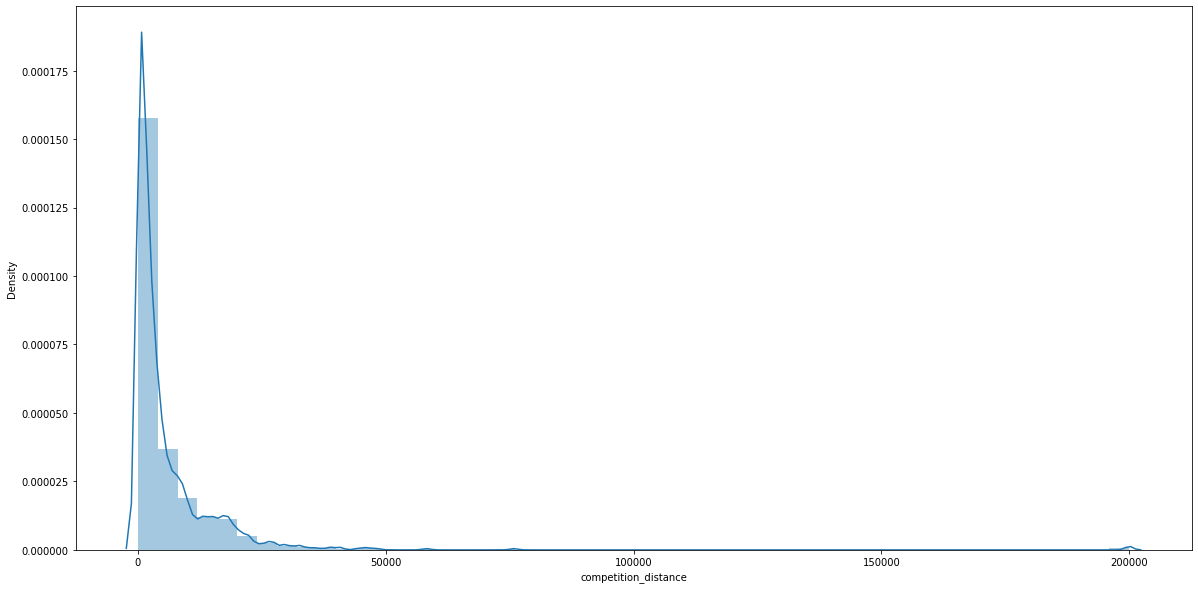

In [25]:
matplotlib.pyplot.figure(figsize=[20, 10])
sns.distplot(df1_copy['competition_distance']);

# Categorical Attributes
### boxplot




In [37]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<IPython.core.display.Javascript object>


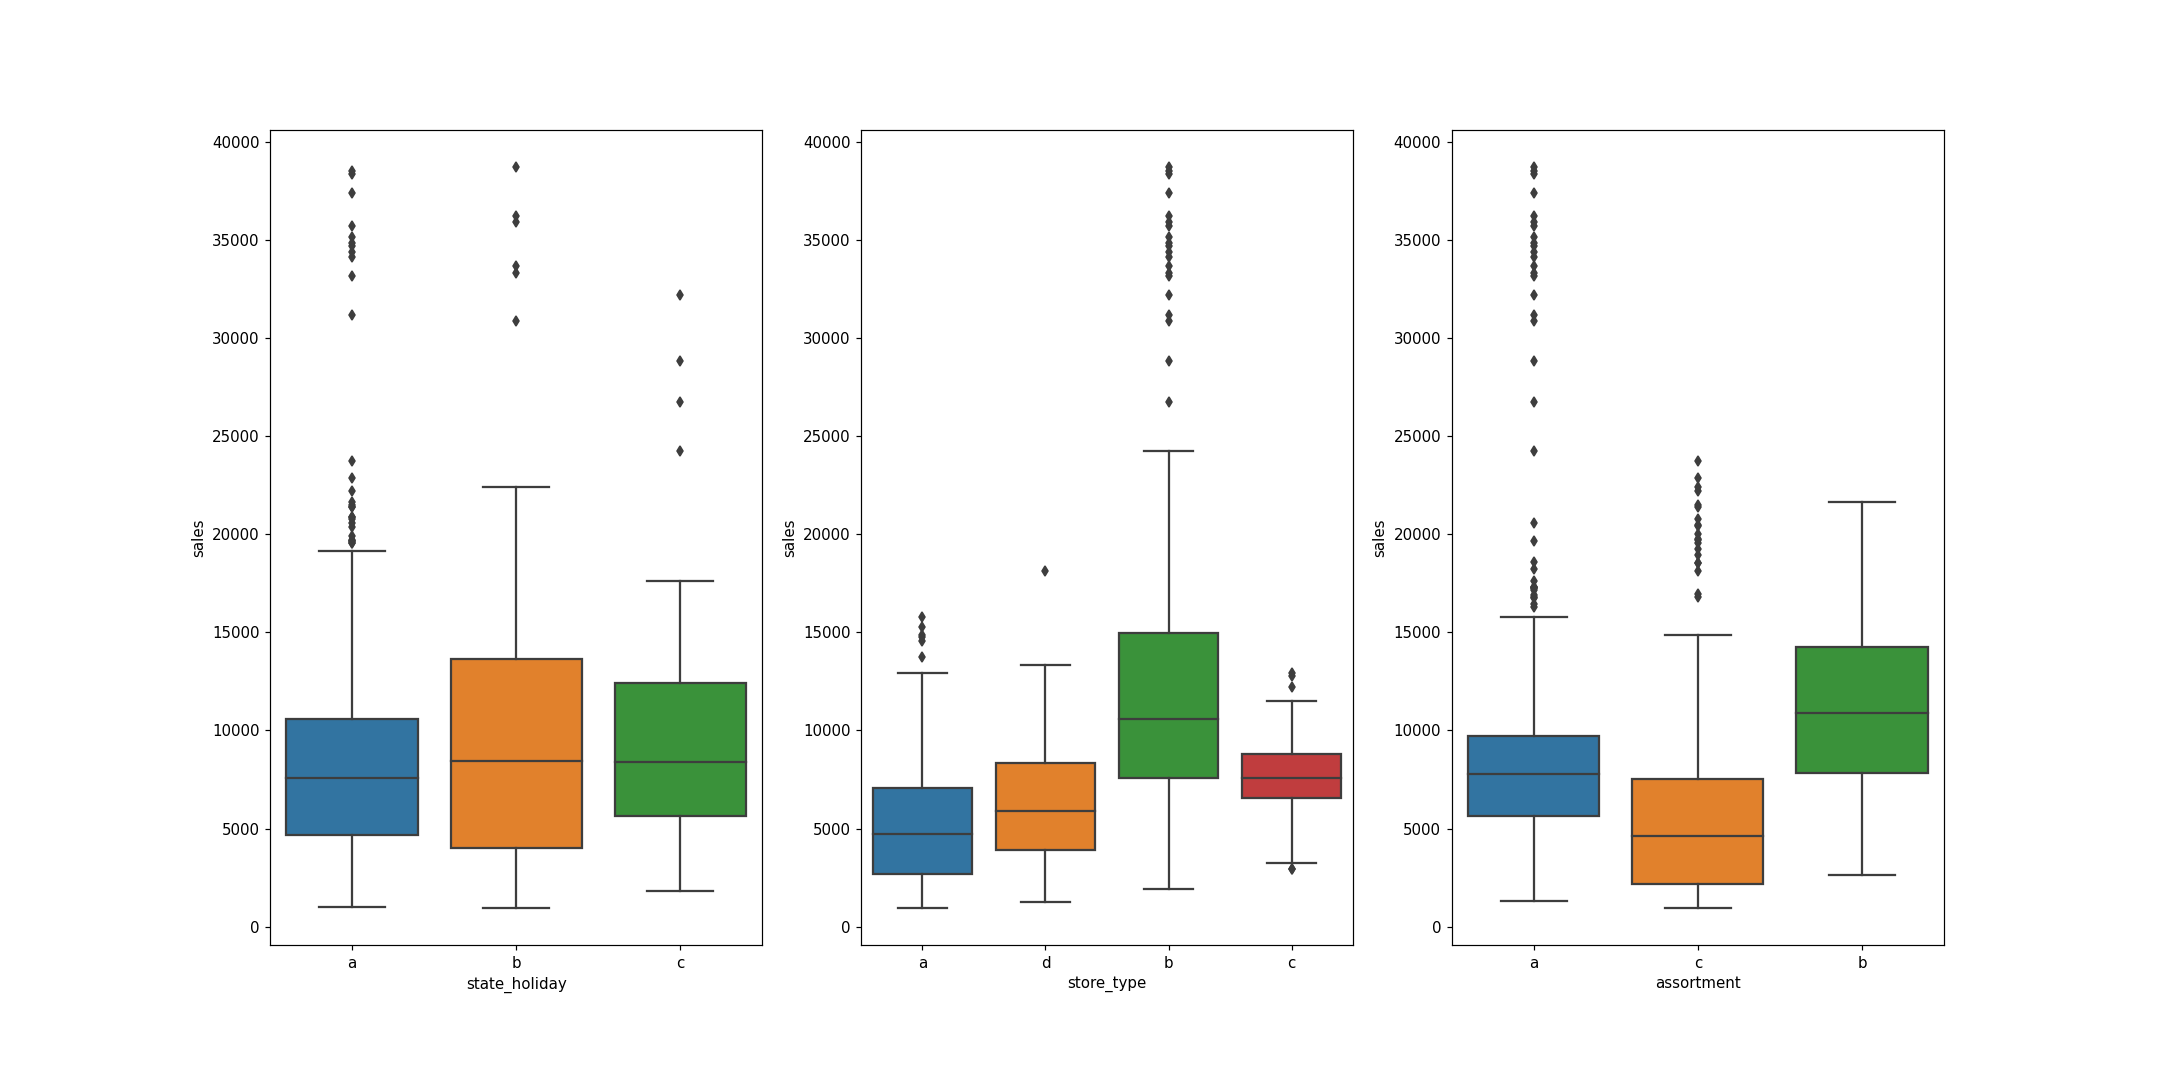

<AxesSubplot:xlabel='assortment', ylabel='sales'>

In [52]:
%matplotlib notebook


filter_0 = df1_copy[(df1_copy.state_holiday != '0') & (df1_copy.sales > 0)]
plt.figure(figsize=[20,10])

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=filter_0)

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=filter_0)

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=filter_0)